# Problem Statement
### 1.Create an AI tool that creates captions based on the image provided by the user. Should also have the option to generate multiple captions based on the image.
### 2. Provide an interface where the user can come and upload images and get AI generated captions. (This part pictures are attached as a word document in the repo)

# Method Followed
###### 1.Loading the required libraries
######  2.Loading the Resnet Model
######  3.Loading the images and captions
######  4.Preprocessing the images and captions
######  5.Generating the captions and pictures
######  6.Traning the model
######  7.Testing for different images
######  8.Saving the model,weights,vocab files so as to deploy them on a local host 

######  Detailing explanation of each step is given along the code


In [1]:
#1.Loading the required libraries
!pip install opendatasets
!pip install pandas
import matplotlib.pyplot  as plt
import opendatasets as od
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
#downloading the flicker dataset from kaggle
#flicker dataset consists of 8091 images , along with 40461 captions 
od.download(
	"https://www.kaggle.com/datasets/srbhshinde/flickr8k-sau")

Skipping, found downloaded files in ".\flickr8k-sau" (use force=True to force download)


In [41]:
#Importing the Resnet Model
#considering the second last layer, since we are not classifying the images
from tensorflow.keras.applications import ResNet50
from keras.models import Model
incept_model=ResNet50(include_top=True)
last =incept_model.layers[-2].output #second last layer
modele=Model(inputs=incept_model.input,outputs=last)

In [45]:
#Loading the images
images_path=r"E:\archive\flickr8k-sau\Flickr_Data\Images/"
images=glob(images_path+'*.jpg')
len(images)

8091

In [7]:
#Considering only 1500 images owimg to system's capacity 
#Converting them RGB , resizing and reshaping all the images
#appending them to the image features
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    #img_name = i.split('/')[-1]
    img_name=i.split('\\')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 100 == 0:
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [8]:
#image_features is a dictionary which consists of name of the image as the key and image which is an array as the value
images_features

{'1000268201_693b08cb0e.jpg': array([0.16725807, 0.46361935, 0.00352358, ..., 0.11895253, 0.42634112,
        1.3225985 ], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([1.4409856 , 1.0435464 , 0.23661098, ..., 0.3971951 , 0.04307785,
        0.30509165], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([1.54498100e+00, 9.86829340e-01, 1.13127186e-04, ...,
        0.00000000e+00, 1.13475180e+00, 4.74883795e-01], dtype=float32),
 '1003163366_44323f5815.jpg': array([0.90305984, 0.11390924, 0.74887145, ..., 0.33106768, 0.        ,
        0.        ], dtype=float32),
 '1007129816_e794419615.jpg': array([0.33239856, 2.2867286 , 0.        , ..., 0.20395696, 0.        ,
        0.25451902], dtype=float32),
 '1007320043_627395c3d8.jpg': array([1.690717  , 0.71951616, 0.09514074, ..., 0.        , 0.24099368,
        0.00307021], dtype=float32),
 '1009434119_febe49276a.jpg': array([0.40478334, 0.3364491 , 0.43302506, ..., 0.36723492, 0.09850331,
        0.16856402], dtype=float32),
 '1

In [9]:
#Loading the captions
caption_path=r"E:\archive\flickr8k-sau\Flickr_Data\Flickr_TextData\Flickr8k.token.txt"
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [11]:
len(captions)

40461

In [12]:
captions

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [14]:
#putting the images along with their captions in a dictionary
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [15]:
len(captions_dict)

1500

In [16]:
captions_dict

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70.jpg': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'T

In [17]:
#processing the captions by making all the letters in the cpations lower 

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [18]:
for k,v in captions_dict.items():
  for vv in v:
    captions_dict[k][v.index(vv)]=preprocessed(vv)

In [19]:
#keeping a counts on the number , each word is repeated how many times
count_words={}
count=1
for k,vv in captions_dict.items():
  for v in vv:
    for word in v.split():
      if word not in count_words:
        count_words[word]=count
        count+=1

In [20]:
len(count_words)

3988

In [21]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
          encoded.append(count_words[word])


        captions_dict[k][vv.index(v)] = encoded

In [22]:
encoded
#now the words will be inform of integers , which will be helpful for deep learning

[1, 190, 480, 2, 553, 551, 389, 2, 553, 350, 16, 17]

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:

from keras.preprocessing.sequence import pad_sequences

In [25]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 29, 30, 31, 2, 42, 30, 37, 43, 44, 33, 45, 46, 38, 39, 4, 25, 47, 16, 17]
[1, 2, 23, 18, 56, 4, 57, 58, 4, 59, 11, 2, 60, 61, 37, 27, 62, 4, 2, 63, 16, 17]
[1, 2, 66, 18, 4, 25, 67, 68, 37, 69, 4, 59, 11, 2, 42, 70, 37, 2, 61, 40, 71, 16, 17]
[1, 2, 250, 31, 13, 251, 136, 252, 253, 82, 25, 254, 136, 64, 88, 26, 2, 255, 37, 2, 131, 82, 256, 16, 17]
[1, 2, 77, 7, 93, 25, 247, 11, 2, 237, 9, 26, 81, 226, 4, 59, 11, 400, 340, 80, 188, 77, 192, 40, 16, 17]
[1, 2, 77, 4, 144, 565, 2, 23, 149, 9, 4, 25, 230, 31, 589, 195, 83, 26, 590, 389, 591, 298, 106, 219, 83, 16, 17]
[1, 25, 18, 4, 25, 656, 586, 657, 7, 145, 88, 26, 48, 75, 200, 658, 147, 7, 103, 2, 29, 659, 31, 25, 39, 7, 660, 661, 16, 17]
[1, 72, 33, 349, 75, 200, 136, 147, 561, 904, 93, 2, 905, 906, 136, 147, 37, 134, 907, 884, 31, 849, 4, 27, 226, 136, 31, 147, 37, 908, 473, 16, 17]
[1, 2, 18, 4, 2, 112, 31, 29, 1485, 37, 42, 1265, 7, 145, 88, 26, 2, 77, 4, 2,

In [26]:
#determing the maximum length so that we can pad zeros for rest of them 
MAX_LEN

37

In [27]:
#defining the generator function
#inseq will basically padding zeros to the rest of its sequence
#outseq will basically is a single array with 1 where the vocab is matched, zero for rest

Batch_size = 5000
VOCAB_SIZE = len(count_words)
def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE+1)[0]
              
                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [28]:
X, y_in, y_out = generator(images_features, captions_dict)

In [29]:
import numpy as np
X=np.array(X)
y_in=np.array(y_in,dtype='float64')
y_out=np.array(y_out,dtype='float64')

In [30]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [47]:
#model definition
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(count_words)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size+1, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size+1)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()
#plot_model(model,show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 repeat_vector_2 (RepeatVect  (None, 37, 128)          0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 37, 128)           510592    
                                                                 
 lstm_6 (LSTM)               (None, 37, 256)           394240    
                          

In [33]:
#running the epochs
model.fit([X, y_in], y_out, batch_size=512, epochs=50)


Epoch 1/50
189/189 [==============================] - 710s 4s/step - loss: 5.2329 - accuracy: 0.1260
Epoch 2/50
189/189 [==============================] - 634s 3s/step - loss: 4.6482 - accuracy: 0.2120
Epoch 3/50
189/189 [==============================] - 651s 3s/step - loss: 4.3402 - accuracy: 0.2505
Epoch 4/50
189/189 [==============================] - 688s 4s/step - loss: 4.1951 - accuracy: 0.2655
Epoch 5/50
189/189 [==============================] - 616s 3s/step - loss: 4.0721 - accuracy: 0.2803
Epoch 6/50
189/189 [==============================] - 671s 4s/step - loss: 3.9476 - accuracy: 0.2946
Epoch 7/50
189/189 [==============================] - 690s 4s/step - loss: 3.7802 - accuracy: 0.3117
Epoch 8/50
189/189 [==============================] - 674s 4s/step - loss: 3.5965 - accuracy: 0.3301
Epoch 9/50
189/189 [==============================] - 588s 3s/step - loss: 3.4453 - accuracy: 0.3449
Epoch 10/50
189/189 [==============================] - 612s 3s/step - loss: 3.3123 - accura

In [34]:
#defining the function to load random images
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [35]:
#predicting for random images
test_feature=modele.predict(getImage(10)).reshape(1,2048)
test_feature

array([[1.2314233 , 0.41572586, 1.2953625 , ..., 1.4492198 , 0.06049356,
        0.21116614]], dtype=float32)

In [36]:
#creating an inverse dictionary 
inv_dict = {v:k for k, v in count_words.items()}

In [37]:
#Saving the model ,weight,vocab file
model.save('model.h5')
model.save_weights('mine_model_weights.h5')
np.save('vocab.npy', count_words)

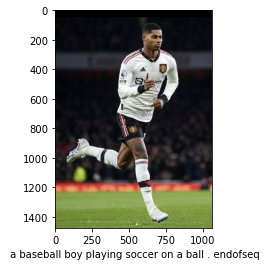

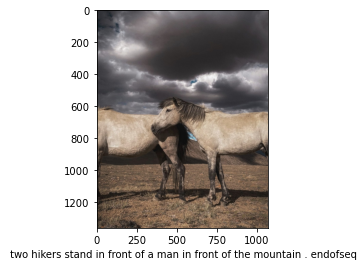

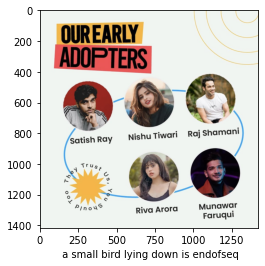

In [42]:
#for images provided in the assignment
# The model predicted to certain extent for image 1
#for image2 and image3 it perfomred poorly
#This might be due to less number of images , That is using 1500 images out of 8091 images
images_path=r"E:\archive\png2jpg/"
images=glob(images_path+'*.jpg')
len(images)
for i in range(3):
    
    #no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(i)).reshape(1,2048)
    
    test_img_path = images[i]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(count_words[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)


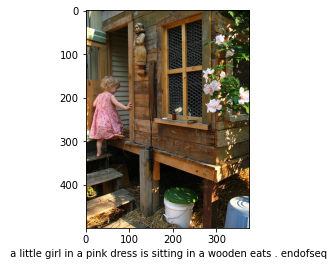

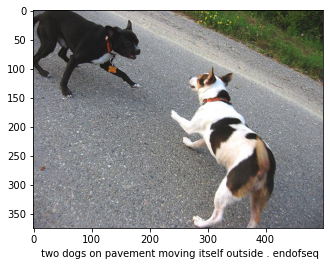

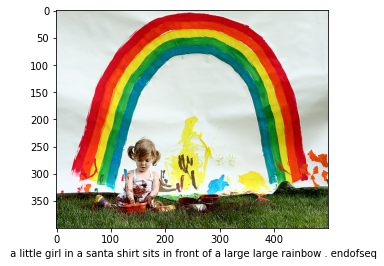

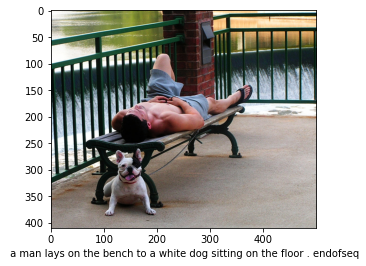

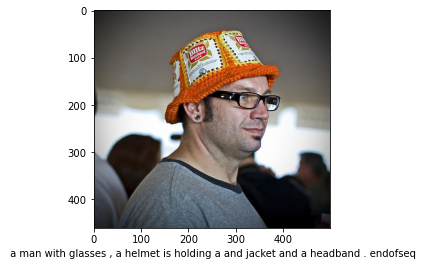

In [44]:
#for images from the Dataset
#It predicted almost all correct for random images from the dataset

images_path=r"E:\archive\flickr8k-sau\Flickr_Data\Images/"
images=glob(images_path+'*.jpg')
len(images)
for i in range(5):
    
    #no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(i)).reshape(1,2048)
    
    test_img_path = images[i]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(count_words[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)
